## Chris Sutton
##
## Lab#1

In [1]:
import re
import collections

## (a) Tokenization.

### 2 points: Describe your processing.

In [2]:
txt = '''NAC has developed a National HIV/AIDS/STI/TB Intervention Strategic Plan (2002-2005) that 
aims to reduce the HIV prevalence rate among Zambians from 19.3% to 11.7% and improve the health
status of people living with HIV/AIDS by 2005.'''
result = re.findall(r"[^ ]\W|[0-9]+\.[0-9]+|\w+" , txt)

### 2 points: Describe any common sources of error or undesirable results in your initial approach; explain how you addressed them – if you did; and indicate what undesirable results might remain.

### 1 point: Show the results of processing the first ten lines of the tokens.txt input file.

In [3]:
f = open('C:/Users/physi/Desktop/NaturalLanguageProcessing/tokens.txt','r',encoding='utf-8')
firstTen = ''
for x in range(9):
    firstTen +=f.readline()
f.close()
re.findall(r"[^ ]\W|[0-9]+\.[0-9]+|\w+" , firstTen)

['Russian',
 'for',
 'plastic',
 'bag',
 'is',
 'полиэтиленовый',
 'пакет',
 '. ',
 '7.',
 '3 ',
 'out',
 'of',
 '10',
 'statistics',
 'is',
 'made',
 'up',
 '. ',
 'I ',
 'do',
 'not',
 'like',
 'green',
 'eggs',
 'and',
 'ham',
 'I ',
 'do',
 'not',
 'like',
 'them',
 'Sam',
 'I-',
 'Am',
 '. ',
 'Dr',
 '. ',
 'Mulholland',
 'lives',
 'on',
 'Mulholland',
 'Dr',
 '. ',
 'in',
 'Hollywood',
 '. ',
 '1,',
 '2,',
 '3.',
 '..',
 'slashdot',
 'com',
 'has',
 'some',
 'interesting',
 'articles',
 '. ',
 "I'",
 'm ',
 'going',
 'to',
 'update',
 'my',
 'resumé',
 '. ',
 'J.',
 'H.',
 'U.',
 'has',
 'a ',
 'great',
 'la',
 'crosse',
 'team',
 '. ',
 'Born',
 'in',
 'the',
 'U.',
 'S.',
 'of',
 'A.',
 'Incorrect',
 'plurala',
 'can',
 'be',
 'fun',
 '. ',
 'is',
 'capitalization',
 'sp',
 '?)',
 'truly',
 'necessary',
 '? ',
 'i ',
 'think',
 'lower',
 'case',
 'is',
 'more',
 'legible',
 '. ',
 'WHEN',
 'PEOPLE',
 'WRITE',
 'IN',
 'ALL',
 'CAPS',
 ', ',
 'IT',
 'FEELS',
 'LIKE',
 'THEY',
 'R

### (b) Corpus statistics. After refining your tokenization method, use it to process the entire tokens.txt file and collect the following statistics based on the tokens that are observed. You can and should compute these statistics in one pass over the input file. It is easy to store counts (i.e., frequencies) for tokens in a dictionary or hashtable.

In [20]:
#input file and read
file = open('C:/Users/physi/Desktop/NaturalLanguageProcessing/tokens.txt','rt',encoding='utf-8')
stringText=file.read()

#perform regex of tokens
resultOfRegEx =re.findall(r"[^ ]\W|[0-9]+\.[0-9]+|\w+" , stringText)

#find number of lines via regex of \n
print("# number of lines processed :",len(re.findall(r"\n" , stringText)))

#count types
uniqueItems= collections.Counter(resultOfRegEx).most_common()
print("number of types :",len(uniqueItems))
#sum total number of tokens
countTotal=0
for x in range(len(uniqueItems)):
    countTotal+=uniqueItems[x][1]
print("total number of tokens : ", countTotal)
#print rankings
print(uniqueItems[0:100])
print("Rank 500: ",uniqueItems[500])
print("Rank 1000: ",uniqueItems[1000])
print("Rank 5000: ",uniqueItems[5000])
print("Rank 10000: ",uniqueItems[10000])

#find the number of items appearing once
coun=0
for x in range(len(uniqueItems)):
    if uniqueItems[x][1] ==1:
        coun+=1
print('# of types appearing once : ',coun, " or ", coun/len(uniqueItems)*100, " percent")

# number of lines processed : 944802
number of types : 330762
total number of tokens :  22796250
[('the', 1008111), ('. ', 870324), (', ', 851855), ('to', 560758), ('and', 522417), ('of', 486728), ('a ', 422347), ('in', 366458), ('for', 203989), ('is', 200229), ('that', 191592), ('s ', 172529), ('on', 159334), ('The', 147631), ('with', 143361), ('was', 130433), ('at', 121567), ('it', 113441), ('be', 107382), ('as', 102845), ('are', 100582), ('I ', 98620), ('said', 94317), ('have', 90375), ('from', 87397), ('by', 83187), ('will', 79767), ('he', 73766), ('has', 73548), ('this', 69958), ('you', 69159), ('not', 67378), ('an', 65246), ('his', 63637), ('.\n', 60150), ('they', 59657), (',\n', 59647), (': ', 59182), ('their', 58507), ('we', 57668), ('or', 55616), ('but', 51184), ('who', 50807), ('t ', 48355), ('more', 46587), ('all', 44756), ('about', 44711), ('one', 44491), ('were', 44369), ('can', 43824), ('had', 42813), ('It', 42610), ('been', 42049), ('up', 42017), (',”', 41281), ('out', 3

### (c) Zipf’s Law. Zipf’s law predicts that the number of times the ith most frequent word will be seen is about k/i times the frequency of the most common word, for some k. Put another way, Zipf’s law states that the product of a term’s frequency and its rank is roughly constant. Create a graphical plot of frequency (vertical) vs. rank (horizontal) for the vocabulary terms, and determine whether Zipf's law holds for this dataset. You can create a plot programmatically (e.g., using Python's matplotlib) or using a separate tool (e.g., MS Excel or Google Sheets). Please produce a log-log plot (i.e., both axes should use a logarithmic scale).

In [21]:
#build list to export to excel of rank/frequency 
import csv
outputlist =[]
for x in range(len(uniqueItems)):
    outputlist.append([x,uniqueItems[x][1]])
print(outputlist[0:10])

f = open('testcsvZipf.csv', 'w')

# using csv.writer method from CSV package
write = csv.writer(f)
write.writerows(outputlist)

[[0, 1008111], [1, 870324], [2, 851855], [3, 560758], [4, 522417], [5, 486728], [6, 422347], [7, 366458], [8, 203989], [9, 200229]]


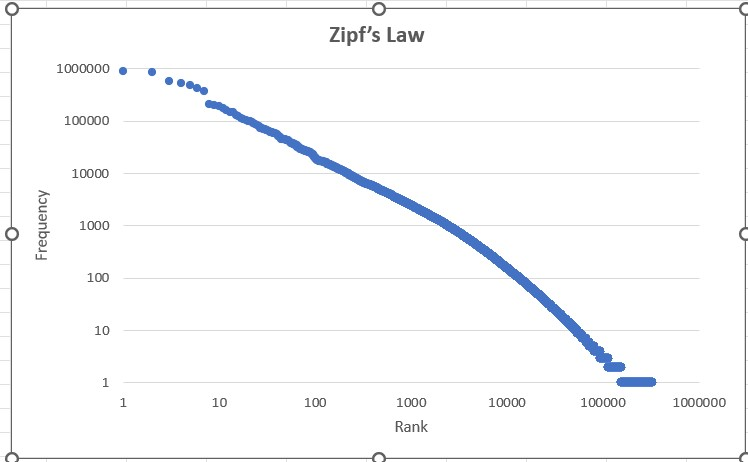